<a href="https://colab.research.google.com/github/nebyathhailu/house-pricing-eda/blob/main/housing_pricing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_data = pd.read_csv('/home/student/ml_dataset/house_prices_train.csv')

In [ ]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
# Display data frames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# print(train_data)

In [ ]:
# Check the dimensions of the dataset
rows, cols = train_data.shape
print(f'The dataset contains {rows} rows and {cols} columns')

The dataset contains 1460 rows and 81 columns


In [ ]:
# Access column name(labels) of data frame
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Summarize the dataset's structure, data types, and missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Statistical summary of data set's numeric columns and transposes the result for easier reading
train_data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [ ]:
# Calculate the skewness of numerical columns in data set
train_data.select_dtypes(include = 'number').skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [ ]:
print('Number of duplicate rows in the dataset', train_data.duplicated().sum())

Number of duplicate rows in the dataset 0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

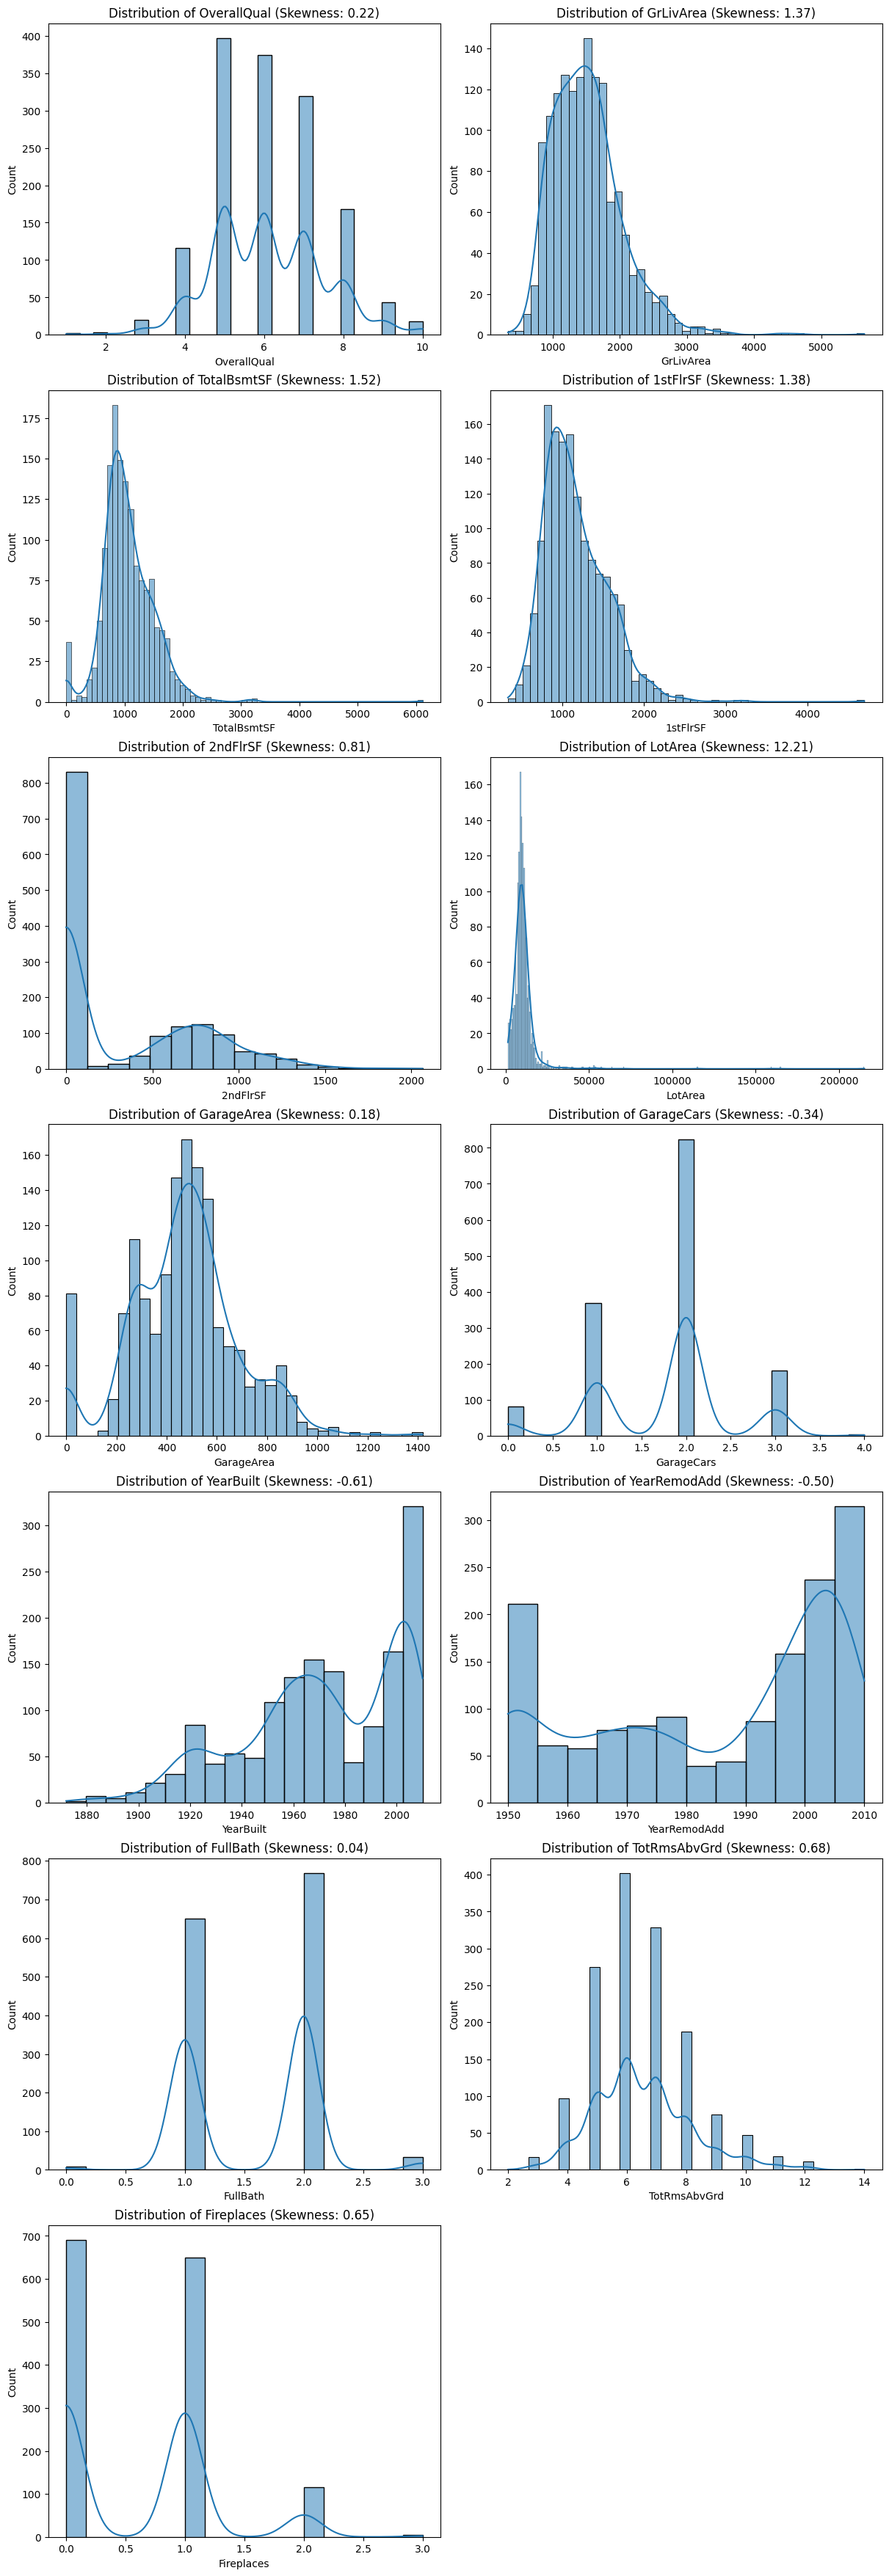

In [ ]:
# List of specific columns relevant for SalePrice
selected_columns = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LotArea', 'GarageArea', 'GarageCars',
    'YearBuilt', 'YearRemodAdd', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces'
]

# Filter columns that exist in the dataset
selected_columns = [col for col in selected_columns if col in train_data.columns]

# Calculate number of rows needed for two plots per row
n_cols = 2
n_rows = int(np.ceil(len(selected_columns) / n_cols))

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows), constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms for selected columns
for i, col in enumerate(selected_columns):
    sns.histplot(train_data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} (Skewness: {train_data[col].skew():.2f})')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()

In [ ]:
# Function to identify columns with missing values
def get_missing_values(df):
    missing = df.isnull().sum()
    return missing[missing > 0].sort_values(ascending=False)

In [ ]:
# Display missing values
missing_values = get_missing_values(train_data)
print("Columns with Missing Values:\n", missing_values)

Columns with Missing Values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [ ]:
# Handle missing values based on data_description.txt and domain knowledge
# Columns where NA means "None" (categorical features)
cat_na_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
               'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
               'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
for col in cat_na_cols:
    train_data[col] = train_data[col].fillna('None')

In [ ]:
# Numerical columns where NA means 0 (e.g., no garage, no basement)
num_na_cols = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2',
               'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
for col in num_na_cols:
    train_data[col] = train_data[col].fillna(0)

In [ ]:
# Other columns with minimal missing values
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])

In [ ]:
# Verify no missing values remain (except SalePrice in test set)
def get_missing_values(df):
    missing = df.isnull().sum()
    return missing[missing > 0].sort_values(ascending=False)

missing_values = get_missing_values(train_data)
print("Missing Values After Imputation:\n", missing_values)

Missing Values After Imputation:
 Series([], dtype: int64)


In [ ]:
# Define highly skewed numerical columns (skewness > 1)
skewed_cols = ['LotArea', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF2',
               'KitchenAbvGr', 'ScreenPorch', 'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF',
               'LotFrontage', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', '1stFlrSF',
               'GrLivArea', 'SalePrice']

In [ ]:
# Create a copy of train_data to avoid modifying the original
train_data_transformed = train_data.copy()

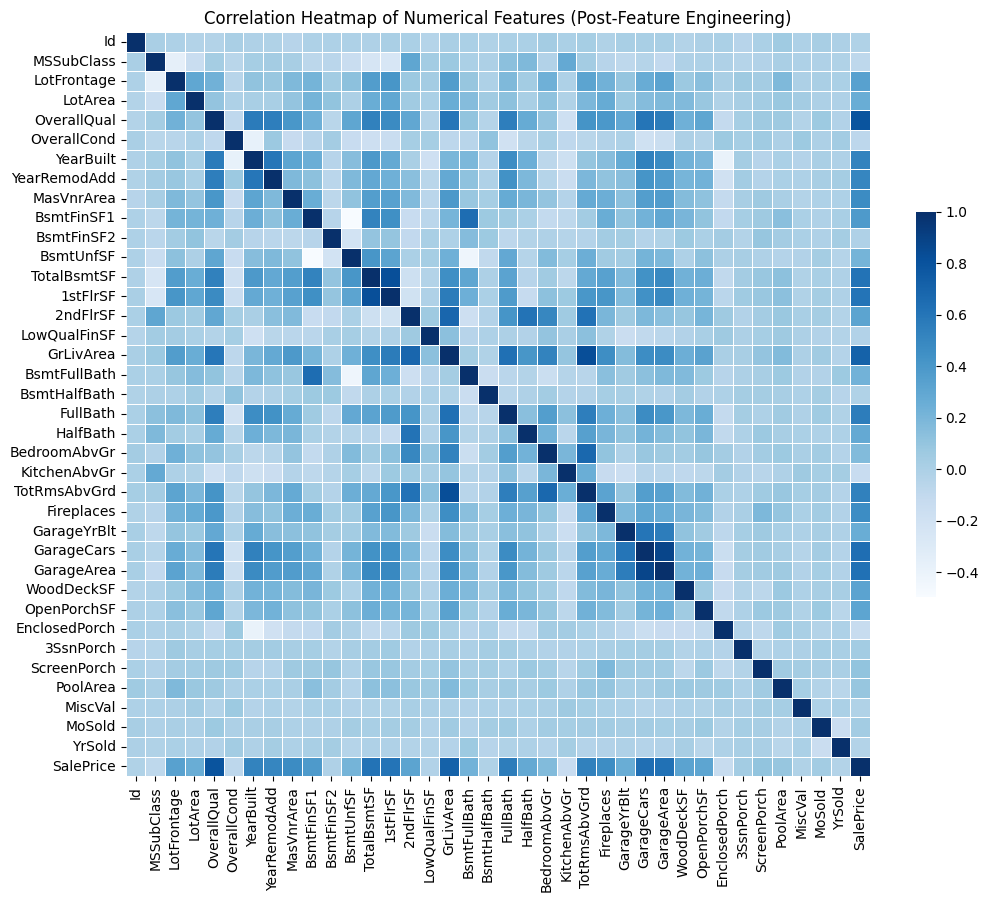


Highly Correlated Feature Pairs (>0.8):
1stFlrSF - TotalBsmtSF: 0.82
GrLivArea - TotRmsAbvGrd: 0.83
GarageArea - GarageCars: 0.88

Correlation with SalePrice:
 SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQual

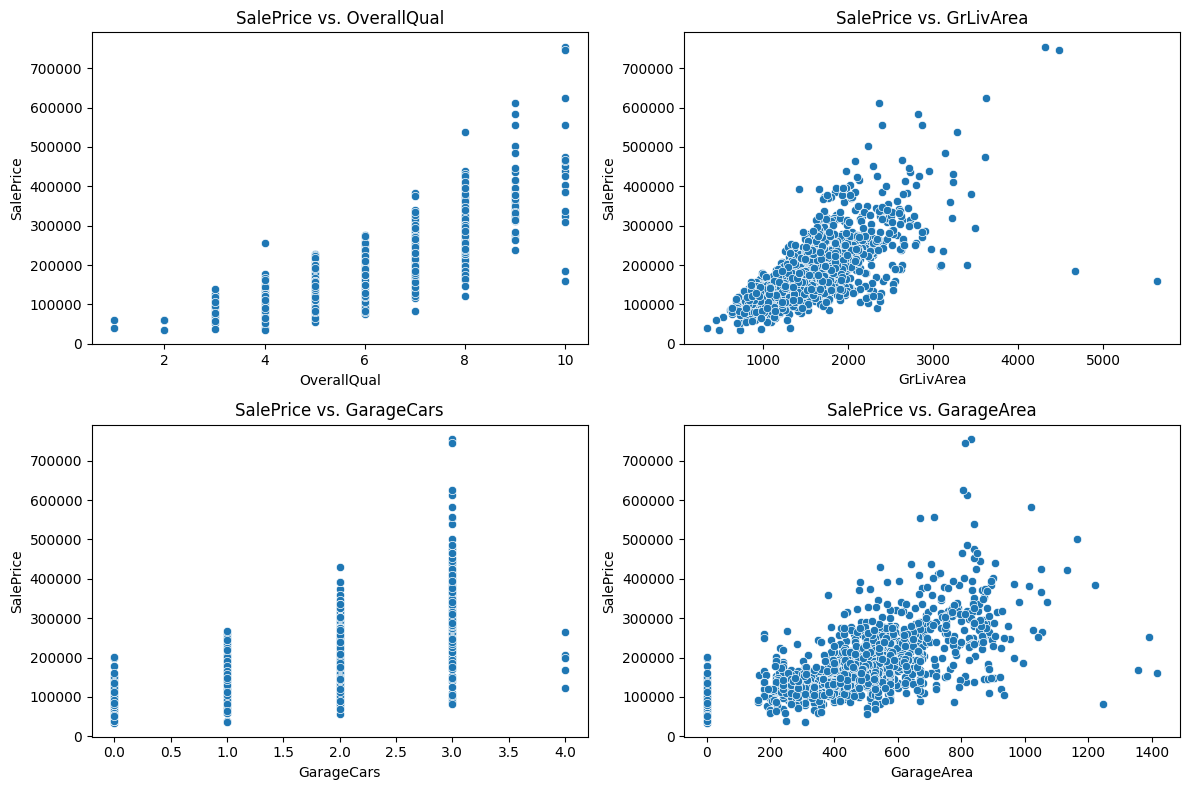

In [ ]:
# Step 1: Filter numerical columns in train_data_transformed
numerical_cols = train_data_transformed.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'SalePrice']  # Exclude SalePrice for heatmap

# Step 2: Compute correlation matrix for numerical features
corr_matrix = train_data_transformed[numerical_cols + ['SalePrice']].corr()

# Step 3: Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='Blues', linewidths=0.5, square=True, cbar_kws={"shrink": 0.5})
plt.title('Correlation Heatmap of Numerical Features (Post-Feature Engineering)')
plt.show()

# Step 4: Identify highly correlated feature pairs (>0.8) to address multicollinearity
high_corr_pairs = [(col1, col2, corr_matrix.loc[col1, col2])
                   for col1 in corr_matrix.columns
                   for col2 in corr_matrix.columns
                   if col1 < col2 and abs(corr_matrix.loc[col1, col2]) > 0.8]
print("\nHighly Correlated Feature Pairs (>0.8):")
for col1, col2, corr in high_corr_pairs:
    print(f"{col1} - {col2}: {corr:.2f}")

# Step 5: Correlation with SalePrice
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nCorrelation with SalePrice:\n", saleprice_corr)

# Step 6: Visualize top correlated features vs. SalePrice
top_features = saleprice_corr.index[1:5]  # Top 4 features (excluding SalePrice)
plt.figure(figsize=(12, 8))
for i, col in enumerate(top_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=train_data_transformed, x=col, y='SalePrice')
    plt.title(f'SalePrice vs. {col}')
plt.tight_layout()
plt.show()

Columns in train_data_transformed: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 

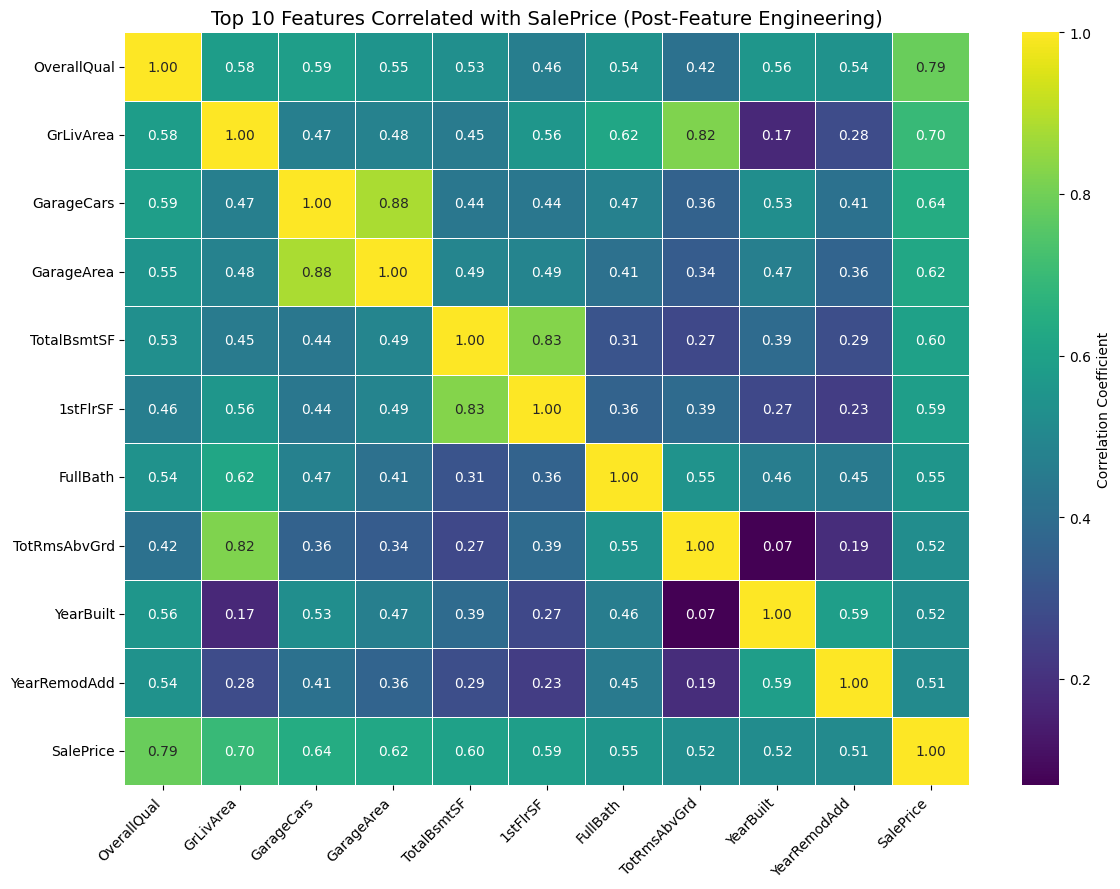

<Figure size 1400x500 with 0 Axes>

In [ ]:
try:
    from sklearn.model_selection import train_test_split
except ImportError:
    print("ERROR: scikit-learn is not installed. Installing now...")
    !pip install scikit-learn
    from sklearn.model_selection import train_test_split
    print("scikit-learn installed successfully.")

# Step 1: Validate train_data_transformed
if 'train_data_transformed' not in locals() or not isinstance(train_data_transformed, pd.DataFrame):
    raise NameError("'train_data_transformed' DataFrame is not defined. Please ensure it is loaded from previous steps (e.g., feature_engineering.py).")
if 'SalePrice' not in train_data_transformed.columns:
    raise ValueError("'SalePrice' column not found in 'train_data_transformed'. Please check your data.")
print("Columns in train_data_transformed:", train_data_transformed.columns.tolist())
print("Shape of train_data_transformed:", train_data_transformed.shape)

# Step 2: Prepare Features (X) and Target (y) and split them
X_train, X_test, y_train, y_test = None, None, None, None
try:
    # Drop non-numeric columns and SalePrice for features
    X = train_data_transformed.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).drop(columns=['SalePrice'], errors='ignore')
    y = train_data_transformed['SalePrice']
    y.name = 'SalePrice'

    # Verify data before splitting
    if X.empty:
        raise ValueError("Feature DataFrame X is empty after selecting numeric columns.")
    if y.isna().any():
        raise ValueError("SalePrice contains missing values.")

    # Split data into training and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("\nData splitting successful:")
    print(f"  X_train shape: {X_train.shape}")
    print(f"  y_train shape: {y_train.shape}, Name: {y_train.name}")
    print(f"  X_test shape: {X_test.shape}")
    print(f"  y_test shape: {y_test.shape}")
except Exception as e:
    print(f"ERROR during data splitting: {e}")
    print("Possible causes: Missing columns, non-numeric SalePrice, or train_test_split not imported.")
    X_train, X_test, y_train, y_test = None, None, None, None

# Step 3: Correlation heatmap
if X_train is not None and isinstance(X_train, pd.DataFrame) and y_train is not None and isinstance(y_train, pd.Series):
    try:
        # Create temporary DataFrame with features and target for correlation
        temp_df_for_corr = X_train.copy()
        temp_df_for_corr['SalePrice'] = y_train

        # Select numeric columns
        numeric_temp_df = temp_df_for_corr.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])
        if 'SalePrice' not in numeric_temp_df.columns:
            raise ValueError("SalePrice is not numeric or missing in the correlation DataFrame.")
        if numeric_temp_df.shape[1] < 2:
            raise ValueError("Not enough numeric columns for correlation analysis.")

        # Calculate correlation matrix
        combined_corr_matrix = numeric_temp_df.corr()

        # Get top 10 features correlated with SalePrice
        correlations_with_target = combined_corr_matrix['SalePrice'].abs().sort_values(ascending=False)
        correlations_with_target_filtered = correlations_with_target.drop('SalePrice', errors='ignore')
        num_features_to_take = min(10, len(correlations_with_target_filtered))
        top_n_feature_names = correlations_with_target_filtered.head(num_features_to_take).index.tolist()

        if not top_n_feature_names:
            print("No numeric features found to correlate with SalePrice.")
        else:
            print(f"\nTop {num_features_to_take} features most correlated with SalePrice:")
            print(correlations_with_target_filtered.head(num_features_to_take))

            # Prepare data for heatmap
            features_for_heatmap_plot = top_n_feature_names + ['SalePrice']
            heatmap_data_corr = numeric_temp_df[features_for_heatmap_plot].corr()

            # Plot heatmap
            plt.figure(figsize=(12, 9))
            sns.heatmap(heatmap_data_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5,
                        cbar_kws={'label': 'Correlation Coefficient'})
            plt.title(f'Top {num_features_to_take} Features Correlated with SalePrice (Post-Feature Engineering)', fontsize=14)
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print(f"ERROR during correlation heatmap creation: {e}")
else:
    print("ERROR: Cannot create correlation heatmap because X_train or y_train is not properly defined.")
    if 'X_train' in locals(): print(f"Type of X_train: {type(X_train)}")
    if 'y_train' in locals(): print(f"Type of y_train: {type(y_train)}")

# Step 4: Boxplots for SalePrice by BldgType and HouseStyle
if X_train is not None and isinstance(X_train, pd.DataFrame):
    try:
        # Identify one-hot encoded columns for BldgType and HouseStyle
        bldgtype_cols = [col for col in train_data_transformed.columns if col.startswith('BldgType_')]
        housestyle_cols = [col for col in train_data_transformed.columns if col.startswith('HouseStyle_')]

        # Reconstruct categorical columns
        temp_df = train_data_transformed.copy()
        if bldgtype_cols:
            temp_df['BldgType_Reconstructed'] = temp_df[bldgtype_cols].idxmax(axis=1).str.replace('BldgType_', '')
        else:
            print("Warning: No BldgType one-hot encoded columns found.")
        if housestyle_cols:
            temp_df['HouseStyle_Reconstructed'] = temp_df[housestyle_cols].idxmax(axis=1).str.replace('HouseStyle_', '')
        else:
            print("Warning: No HouseStyle one-hot encoded columns found.")

        # Create boxplots
        plt.figure(figsize=(14, 5))
        if 'BldgType_Reconstructed' in temp_df.columns:
            plt.subplot(1, 2, 1)
            sns.boxplot(data=temp_df, x='BldgType_Reconstructed', y='SalePrice')
            plt.title('SalePrice by BldgType', fontsize=12)
            plt.xlabel('BldgType')
            plt.ylabel('SalePrice (Log-Transformed)')
            plt.xticks(rotation=45)

        if 'HouseStyle_Reconstructed' in temp_df.columns:
            plt.subplot(1, 2, 2)
            sns.boxplot(data=temp_df, x='HouseStyle_Reconstructed', y='SalePrice')
            plt.title('SalePrice by HouseStyle', fontsize=12)
            plt.xlabel('HouseStyle')
            plt.ylabel('SalePrice (Log-Transformed)')
            plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

        # Clean up reconstructed columns
        temp_df = temp_df.drop(columns=['BldgType_Reconstructed', 'HouseStyle_Reconstructed'], errors='ignore')
    except Exception as e:
        print(f"ERROR during boxplot creation: {e}")
else:
    print("Warning: Cannot create boxplots because X_train is not defined.")
